<a href="https://colab.research.google.com/github/Joshua250304/Linear-Regression-Health-Cost-Calculator/blob/main/fcc_predict_health_costs_with_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [9]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')


--2026-01-08 05:59:27--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.2.33, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.2’

insurance.csv.2     100%[===================>]  49.09K  --.-KB/s    in 0s      

2026-01-08 05:59:27 (181 MB/s) - ‘insurance.csv.2’ saved [50264/50264]



In [11]:
df = dataset.copy()
df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df = pd.get_dummies(df, columns=['region'], prefix= '')

train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')

In [12]:
from sklearn.utils import validation
from IPython.core import history
normalizer = layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_dataset))

model = keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1),
              loss='mae',
              metrics=['mae', 'mse'])

history = model.fit(
    train_dataset,
    train_labels,
    epochs=100,
    verbose=1,
    validation_split=0.2
)

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 11022.9463 - mae: 11022.9463 - mse: 244488400.0000 - val_loss: 5794.1953 - val_mae: 5794.1953 - val_mse: 92985680.0000
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4180.0156 - mae: 4180.0156 - mse: 51992428.0000 - val_loss: 3623.3955 - val_mae: 3623.3955 - val_mse: 42380748.0000
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3446.1331 - mae: 3446.1331 - mse: 39499756.0000 - val_loss: 3479.0847 - val_mae: 3479.0847 - val_mse: 42182332.0000
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3255.2698 - mae: 3255.2698 - mse: 35208896.0000 - val_loss: 3566.4497 - val_mae: 3566.4497 - val_mse: 36747712.0000
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2814.7551 - mae: 2814.7551 - mse: 25513008.0000 - val_loss: 3019.9551 - val_mae: 3019.9551 - val_mse: 31292354.0000
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2705.7954 - mae: 2705.7954 - mse: 27802304.0000 - val_loss: 27

9/9 - 0s - 39ms/step - loss: 2529.4290 - mae: 2529.4290 - mse: 33367518.0000
Testing set Mean Abs Error: 2529.43 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


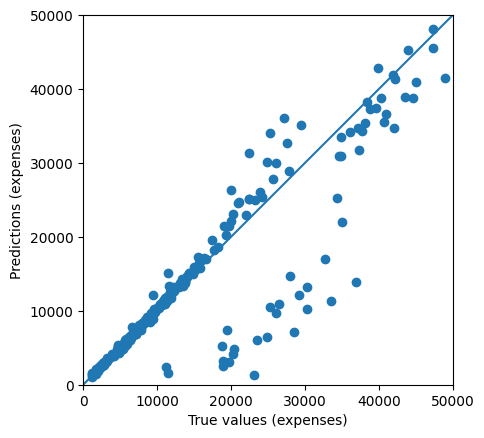

In [13]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
